<a href="https://colab.research.google.com/github/MarcM987/test-assignment-MarcM987/blob/main/Copy_of_DATA_301_Lab_1A_Marc_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**
1. Knowing that in general higher numbers are less likely than lower numbers, I would assume 1 would appear most often and 9 the least often for first digits. However, I don't have much to base that off of other than personal obervations. So, 1-9 gives 9 digits as 0 is not counted per the example.
1 and 9 both being a single digit. 1/9 = 11.11%. 
So the percentage of values that will have a first digit of 1 or 9 are both 11.11%. 
2. Similarily, I would assume from personal observation that this would be similar to the previous distribution, but I expect there would be more digits ending with 9 than begin with 9 (thinking $x.99 seen in commercial product pricing) and overall still more 1s. However, following the previous logic, numbers ending in 1 or 9 would also be 11.11%. 


## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [3]:
# ENTER YOUR CODE HERE.
import pandas as pd

data_dir = "http://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500.set_index(["Name"], inplace=True)
df_sp500.sort_index()

,date,open,close,volume
Name,,,,
A,2018-02-01,$73.18,$72.83,2008177
AAL,2018-02-01,$54.00,$53.88,3623078
AAP,2018-02-01,$116.24,$117.29,760629
AAPL,2018-02-01,$167.16,$167.78,47230787
ABBV,2018-02-01,$112.24,$116.34,9943452
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**ENTER YOUR WRITTEN EXPLANATION HERE.**

As stock symbols/Names are unique, they are immediately appealing as an index. This would potentially become problematic if the data set was expanded to multiple days (where I would then consider a combination of Name and date), but our specific data set is limited to a single day and thus Name serves perfectly as the index. 

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

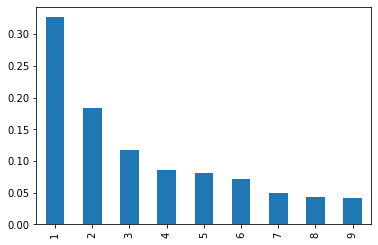

In [48]:
# ENTER YOUR CODE HERE.
vol_first_dig = df_sp500['volume'].astype('string').str[0]
vol_first_dig_probs = vol_first_dig.value_counts(normalize=True).sort_index()
vol_first_dig_probs.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

The data classfiication of a number begining with a 1, 2, 3, 4, 5, 6, 7, 8, or 9 is a categorical classification. However, if we were then to count the occurences of such classifications, then that would be a quanititative observation. Hence my distribution visualization choice. My prediction from question 0 was incredibly off. 

My natural assumption was closer with more lower digits than higher digits, but my logic based approach must have been very flawed as it would have resulted in an even distribution at 11.11% which is certainly not shown above.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

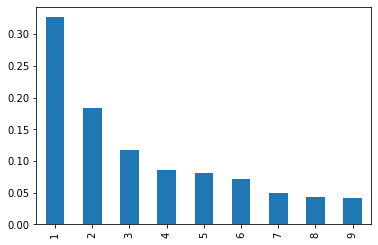

In [47]:
# ENTER YOUR CODE HERE.
vol_last_dig = df_sp500['volume'].astype('string').str[-1]
vol_last_dig_probs = vol_first_dig.value_counts(normalize=True).sort_index()
vol_last_dig_probs.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

My prediciton was again very off base on my logical approach with more . However, my natural assumption was still closer  although being off in expecting more 9s this time as the distribution above is identical to the previous.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

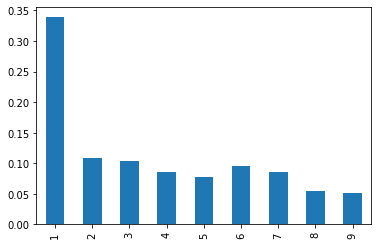

In [46]:
# ENTER YOUR CODE HERE.
closing_first_dig = df_sp500['close'].astype('string').str[1] #skips the $ char
closing_first_dig_probs = closing_first_dig.value_counts(normalize=True).sort_index()
closing_first_dig_probs.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

Pandas likely infered this variable as an 'object' due to the $ symbol. The distribution here is very interesting. Although it remains similar with the significant 1s count and the general downward trend, it seems to be more even after the 1s. I suspect this is due to the nature of the variables. The previous variable, 'volume', begins at 0 before increasing by its nature. However, our current variable, 'closing', is based on value which could be anything. I beleive the differences in distribution are likely due to the more random behavior of the 'closing' than the more steadily growing behavior of the 'volume'.